<a href="https://colab.research.google.com/github/HoneyDew21/Crypto-Market-Prediction-using-RNN/blob/main/Crypto_Market_Prediction_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests,pandas as pd,numpy as np,matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
api_key= 'b9ed0c5164684339adc326ac89861d23'
api_url='https://api.twelvedata.com/time_series?symbol=BTC/USD&start_date=2023-12-30&end_date=2024-01-15&interval=5min&apikey=demo'

In [ ]:
data = requests.get(api_url).json()
data_final=pd.DataFrame(data['values'])
data_final

,datetime,open,high,low,close
0,2024-01-15 00:00:00,41698.13000,41815.93000,41680.00000,41810.63000
1,2024-01-14 23:55:00,41738.26000,41820.89000,41696.60000,41697.33000
2,2024-01-14 23:50:00,41962.00000,41962.01000,41680.73000,41735.04000
3,2024-01-14 23:45:00,41893.40000,41965.68000,41881.84000,41962.01000
4,2024-01-14 23:40:00,41817.27000,41914.63000,41731.57000,41892.30000
...,...,...,...,...,...
4604,2023-12-30 00:20:00,42118.85000,42150.94000,42100.91000,42148.51000
4605,2023-12-30 00:15:00,42098.44000,42154.87000,42075.50000,42116.40000
4606,2023-12-30 00:10:00,42094.94000,42098.95000,42062.71000,42098.41000
4607,2023-12-30 00:05:00,42050.50000,42094.94000,42033.20000,42094.94000


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_final['close'].values.reshape(-1,1))
scaled_data

array([[0.11224575],
       [0.09829262],
       [0.10293669],
       ...,
       [0.14768646],
       [0.14725913],
       [0.14142664]])

In [ ]:
time_intervals_to_train = 24
prediction_interval = 12
x_train = []
y_train = []

In [ ]:
for i in range(time_intervals_to_train, len(scaled_data) - prediction_interval):
  x_train.append(scaled_data[i-time_intervals_to_train:i,0])
  y_train.append(scaled_data[i + prediction_interval, 0])

In [ ]:
x_train =np.array(x_train)
y_train =np.array(y_train)

In [ ]:
x_train.shape

(4573, 24)

In [ ]:
y_train.shape

(4573,)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(4573, 24, 1)

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences= True, input_shape = (x_train.shape[1],1), activation ='relu'))
model.add(Dropout(0.4))
model.add(LSTM(64,return_sequences= True, activation='relu'))
model.add(Dropout(0.3))
model.add(LSTM(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation ='sigmoid'))

In [ ]:
model.compile(loss ='mean_squared_error', optimizer='adam', metrics =['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
72/72 [==============================] - 20s 88ms/step - loss: 0.0179 - accuracy: 4.3735e-04
Epoch 2/10
72/72 [==============================] - 8s 114ms/step - loss: 0.0042 - accuracy: 4.3735e-04
Epoch 3/10
72/72 [==============================] - 7s 95ms/step - loss: 0.0037 - accuracy: 4.3735e-04
Epoch 4/10
72/72 [==============================] - 8s 106ms/step - loss: 0.0035 - accuracy: 4.3735e-04
Epoch 5/10
72/72 [==============================] - 8s 109ms/step - loss: 0.0034 - accuracy: 4.3735e-04
Epoch 6/10
72/72 [==============================] - 6s 90ms/step - loss: 0.0035 - accuracy: 4.3735e-04
Epoch 7/10
72/72 [==============================] - 8s 109ms/step - loss: 0.0034 - accuracy: 4.3735e-04
Epoch 8/10
72/72 [==============================] - 6s 87ms/step - loss: 0.0031 - accuracy: 4.3735e-04
Epoch 9/10
72/72 [==============================] - 9s 124ms/step - loss: 0.0030 - accuracy: 4.3735e-04
Epoch 10/10
72/72 [==============================] - 6s 88ms/step -

In [ ]:
test_api_url = f'https://api.twelvedata.com/time_series?symbol=BTC/USD&start_date=2024-01-14&end_date=2024-01-16&interval=5min&apikey=demo'
test_data = requests.get(test_api_url).json()
test_data_final = pd.DataFrame(test_data['values'])
test_data_final

,datetime,open,high,low,close
0,2024-01-16 00:00:00,42481.69000,42535.74000,42454.27000,42490.94000
1,2024-01-15 23:55:00,42576.93000,42581.38000,42462.41000,42490.16000
2,2024-01-15 23:50:00,42589.35000,42613.06000,42565.19000,42584.20000
3,2024-01-15 23:45:00,42534.29000,42615.68000,42526.46000,42591.18000
4,2024-01-15 23:40:00,42530.61000,42541.32000,42500.24000,42534.30000
...,...,...,...,...,...
572,2024-01-14 00:20:00,42802.83000,42822.83000,42769.07000,42770.63000
573,2024-01-14 00:15:00,42820.46000,42848.36000,42801.34000,42801.34000
574,2024-01-14 00:10:00,42836.74000,42883.62000,42808.96000,42824.98000
575,2024-01-14 00:05:00,42815.28000,42878.01000,42796.28000,42835.27000


In [ ]:
bitcoin_prices = pd.to_numeric(test_data_final['close'],errors = 'coerce').values

In [ ]:
test_inputs = test_data_final['close'].values
test_inputs = test_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(test_inputs)

In [ ]:
model_inputs.shape

(577, 1)

In [ ]:
x_test =[]

for x in range(time_intervals_to_train, len(model_inputs)):
  x_test.append(model_inputs[x-time_intervals_to_train:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
x_test

array([[[0.49683534],
        [0.49634703],
        [0.55522027],
        ...,
        [0.46576474],
        [0.4771525 ],
        [0.56850494]],

       [[0.49634703],
        [0.55522027],
        [0.55959007],
        ...,
        [0.4771525 ],
        [0.56850494],
        [0.616629  ]],

       [[0.55522027],
        [0.55959007],
        [0.52398064],
        ...,
        [0.56850494],
        [0.616629  ],
        [0.61838819]],

       ...,

       [[0.64672297],
        [0.64310443],
        [0.66742627],
        ...,
        [0.65181271],
        [0.67193379],
        [0.69115962]],

       [[0.64310443],
        [0.66742627],
        [0.66842168],
        ...,
        [0.67193379],
        [0.69115962],
        [0.70595932]],

       [[0.66742627],
        [0.66842168],
        [0.67963414],
        ...,
        [0.69115962],
        [0.70595932],
        [0.71240132]]])

In [ ]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

18/18 [==============================] - 1s 14ms/step


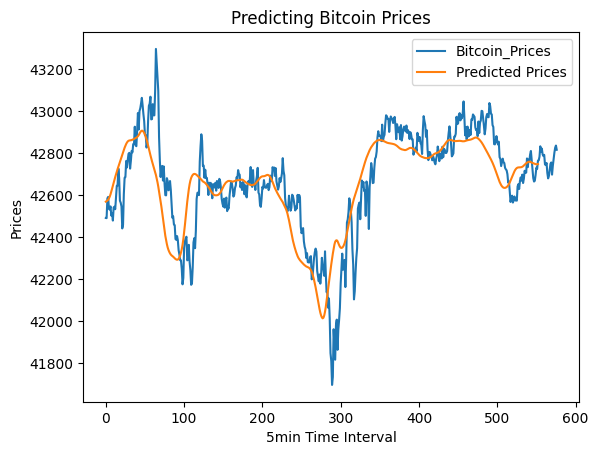

In [ ]:
plt.plot(bitcoin_prices, label ='Bitcoin_Prices')
plt.plot(prediction_prices, label='Predicted Prices')
plt.title('Predicting Bitcoin Prices')
plt.xlabel('5min Time Interval')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [ ]:
last_data = model_inputs[len(model_inputs)+1 - time_intervals_to_train : len(model_inputs) +1,0]
last_data = np.array(last_data)

In [ ]:
last_data.shape

(23,)

In [ ]:
last_data = np.reshape(last_data,(1, last_data.shape[0],1))

In [ ]:
prediction= model.predict(last_data)

1/1 [==============================] - 0s 371ms/step


In [ ]:
prediction = scaler.inverse_transform(prediction)

In [ ]:
prediction

array([[42744.668]], dtype=float32)